# Data Prep for Simple Classical and Quantum Estimators

_This notebook prepares sample data for use with "Simple" classical and quantum estimators, written in **PennyLane and PyTorch**_.

**By:** Jacob Cybulski ([website](https://jacobcybulski.com/))<br>
**Date:** 1 October 2024<br>
**Updates:** 1 October 2024<br>
**Aims:** To prepare data for the quantum and classical estimators, to compare them.<br/>
**License:** 
This project is licensed under the [Creative Commons CC-BY](https://creativecommons.org/licenses/by/4.0/)<br>
**Changes:** All changes to this code must be listed at the bottom of this notebook

## Libraries

In [1]:
import sys
sys.path.append('.')
sys.path

['/home/jacob/miniconda3/lib/python311.zip',
 '/home/jacob/miniconda3/lib/python3.11',
 '/home/jacob/miniconda3/lib/python3.11/lib-dynload',
 '',
 '/home/jacob/venv/pl/lib/python3.11/site-packages',
 '.']

In [2]:
### General libraries

import os
import pylab
import math
import time
import copy
import numpy as nnp
import pandas as pd
from IPython.display import clear_output

import matplotlib.pyplot as plt
from matplotlib import set_loglevel
set_loglevel("warning")

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
### Import utilities
from utilities import *

## Prepare a data set

Data set (requires: pip install sklearn):
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes" target="_blank">Diabetes</a>:
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.  

***

<div style="font-size:24px; color:red">Data preparation objectives:</div>

- *Fetch and understand data*
- *Select numeric variables only*
- *Deal with missing values*
- *Prepare the target*
- *Standardise all variables*
- *Reduce dimensionality using PCA*
- *Save PCA results in Pandas format into a file*

***
<br/>

### Files location

In [4]:
RSRC_STORE = 'rsrc'
RSRC_NAME = 'diabetes'

### Fetch and understand data

In [5]:
from sklearn import datasets
bunch = datasets.load_diabetes(return_X_y=False, as_frame=True, scaled=False)
print(bunch.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
X_y = bunch.frame
X_y.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [7]:
# provide some stats on numeric data
X_y.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### Deal with missing values

In [8]:
# Identify columns with missing values
X_y.isna().sum().loc[lambda x : x > 0].sort_index()

Series([], dtype: int64)

In [9]:
# There are no missing values

### Analyse the label

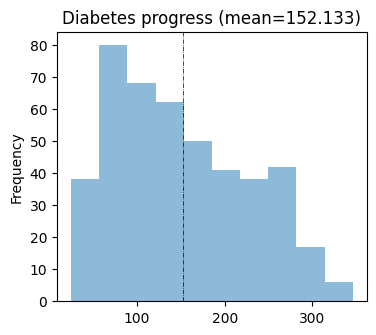

In [10]:
# Observe label distribution
diabetes_ymean = X_y['target'].mean()
ax = X_y['target'].plot.hist(bins=10, alpha=0.5, title=f'Diabetes progress (mean={round(diabetes_ymean, 3)})', figsize=(4,3.5))
plt.axvline(diabetes_ymean, color='k', linestyle='-.', linewidth=0.5);

### Standardise both predictors and a target

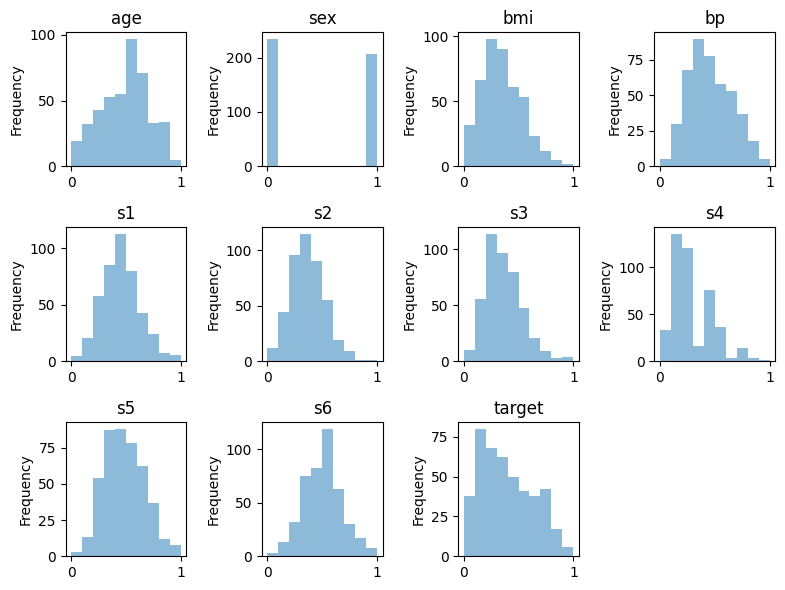

In [11]:
# Standardise all variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler
diabetes_scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled = diabetes_scaler.fit_transform(X_y) 
X_y_std = pd.DataFrame(scaled, columns=X_y.columns)
multi_plot_hist(X_y_std, n_cols = 4, figsize=(8,6));

### Prepare X and y parts

In [12]:
y_std = X_y_std['target'].to_frame()
X_std = X_y_std.drop('target', axis=1)

### Reduce dimensionality using PCA

In [13]:
### Reduce the number of variables using PCA
from sklearn.decomposition import PCA

n_components = 8
seed = 2024

diabetes_pca = PCA(n_components=n_components)
X_pca = diabetes_pca.fit_transform(X_std)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{n:02d}' for n in range(X_pca.shape[1])])
pca_var = diabetes_pca.explained_variance_ratio_

In [14]:
### Sample of saved X predictors
nnp.round(X_pca[0:5], 3)

,PC00,PC01,PC02,PC03,PC04,PC05,PC06,PC07
0,0.554,-0.073,0.110,-0.258,0.111,-0.149,0.070,0.128
1,-0.609,-0.280,0.133,0.195,-0.002,-0.184,-0.057,-0.002
2,0.542,-0.108,0.261,-0.140,0.285,-0.155,0.108,0.125
3,-0.452,0.107,-0.483,0.014,-0.027,0.051,-0.086,-0.017
4,-0.469,0.047,0.060,0.076,0.009,-0.151,-0.160,-0.126


In [15]:
### Sample of saved y label
y_std[0:5]

,target
0,0.392523
1,0.155763
2,0.361371
3,0.563863
4,0.342679


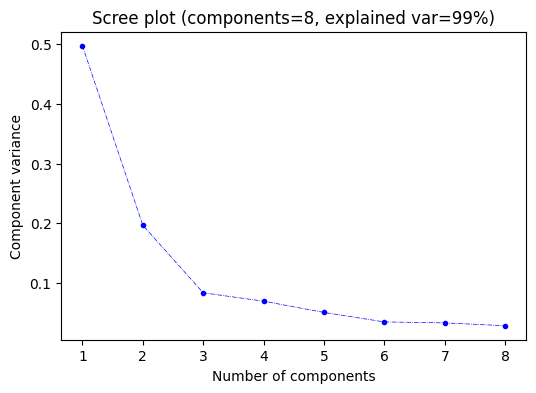

In [16]:
### Scree plot for the selected PCs
plt.figure(figsize=(6,4))
plt.plot(
    range(1,len(pca_var)+1), pca_var,
    c='blue', ls='-.', lw=0.5, marker='.')

plt.legend('', frameon=False)
plt.xlabel('Number of components')
plt.ylabel('Component variance')
plt.title(f'Scree plot (components={len(pca_var)}, explained var={int(sum(pca_var*100))}%)');

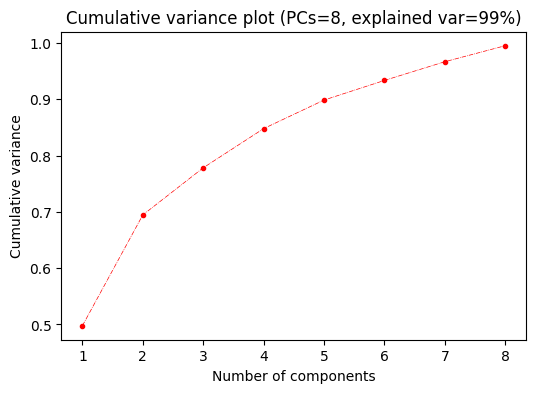

In [17]:
### Cumulative variance plot for the selected PCs
plt.figure(figsize=(6,4))
plt.plot(
    range(1,len(pca_var)+1), nnp.cumsum(pca_var),
    c='red', ls='-.', lw=0.5, marker='.')

plt.legend('', frameon=False)
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance')
plt.title(f'Cumulative variance plot (PCs={len(pca_var)}, explained var={int(sum(pca_var*100))}%)');

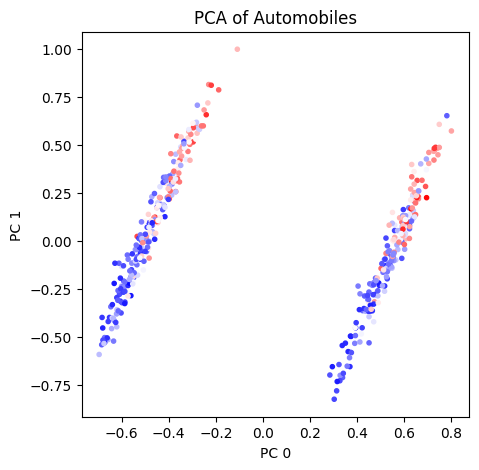

In [18]:
### Plot the two PCs
sel_pc = [0, 1] # [2, 3]
plt.figure(figsize=(5,5))
plt.title('PCA of Automobiles')
plt.xlabel(f'PC {sel_pc[0]}')
plt.ylabel(f'PC {sel_pc[1]}')
plt.scatter(X_pca.iloc[:, sel_pc[0]], X_pca.iloc[:, sel_pc[1]], c=y_std.iloc[:, 0], cmap='bwr', marker='.');

### Save the preared data into a resource folder

In [19]:
x_file_path = os.path.join(RSRC_STORE, RSRC_NAME+'_x.pkl')
y_file_path = os.path.join(RSRC_STORE, RSRC_NAME+'_y.pkl')
X_pca.to_pickle(x_file_path)
y_std.to_pickle(y_file_path)
print(f'\nSaved the prepared data set:   "{RSRC_NAME}" in store "{RSRC_STORE}"')
print(f'To read the data set back use: "df = pd.read_pickle(file_path)"')


Saved the prepared data set:   "diabetes" in store "rsrc"
To read the data set back use: "df = pd.read_pickle(file_path)"


***

<div style="font-size:24px; color:red">Other data prep tasks that could have been done:</div>
<em>Especially if we had a larger data sets</em>

- *Early partitioning of data $^{1}$*
- *Consideration of categorical variables (was not needed)*
- *Dealing with missing values (was not needed)*
- *Dealing with variables of zero or very low IQR variance*
- *Analysis and transformation of variables skewness $^{2}$*
- *Analysis of target variable skewness $^{3}$*
- *Elimination of outliers before PCA*
- *Possible use of a robust PCA (tolerant of outliers)*
- *Analysis of PCA projections*
- *Elbow analysis of the scree plot*
- *All data transformation resources should have been archived for later use*
- *See: <a href="https://github.com/ironfrown/r-examples/tree/master/clustering" target="_blank">an example of extensive data preparation in R.</a>*

<div style="font-size:14px;">Notes:

<ol>
<li><em> Data partitioning should have been done at the very beginning. Subsequently, all transformation models (or their constants) need applied to training data and saved (here: auto_selvars, auto_xmean, auto_ymean, auto_scaler, auto_pca). Later the transformations can be applied to test data, and any new data acquired in the future. This was not done in this demo for these reasons: (1) the data set was very small, and (2) it would significantly extend the length of this demo, (3) additional data preparations are unique to the classical and quantum classification.</em></li>
    
<li><em> Skewness may or may not affect learning of neural networks - analysis of residual skewness is necessary in regression analysis, however, it may not be applicable to NNs or QNNs.</em></li>

<li><em> Note that we have implicitly performed such an analysis when reducing the label to a binary variable.</em></li>
<li><em>Spliting of data into training and testing partition has been deferred to the notebook detailing a specific model creation and further data preparation as required.</em></li>

</ul>
</div>

***

### Data preparation completed

## Modifications (do not remove)
Under the [Creative Commons CC-BY](https://creativecommons.org/licenses/by/4.0/) license, if you perform any changes to this notebook, please list them here, adding a note with your name, contact details, date and changes to the code.

- [Jacob Cybulski](http://jacobcybulski.com) (2024, 1 Oct): The author of this notebook added this section to record all code changes

## Systems in use

In [20]:
!pip list | grep -e PennyLane -e torch

PennyLane                 0.40.0
PennyLane_Lightning       0.40.0
torch                     2.6.0+cpu
torchaudio                2.6.0+cpu
torchsummary              1.5.1
torchvision               0.21.0+cpu

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
